# Set up variables for training

In [3]:
import models.VAEWavenet.WaveVaeDenoiser as WNVAE
import torch
from torch import nn
import numpy as np
from tqdm import tqdm
from torch.utils.data import DataLoader
from torch.nn.parallel import DistributedDataParallel as DDP
import torch.distributed as dist

def printGPUInfo():
    t = torch.cuda.get_device_properties(0).total_memory
    r = torch.cuda.memory_reserved(0)
    a = torch.cuda.memory_allocated(0)
    print("Total memory =", t)
    print("Reserved memory =", r)
    print("Allocated memory =", a)
    
# printGPUInfo()

learning_rate = 0.0001
batchsize = 2
loss_fn = torch.nn.MSELoss()
device='cuda:0'
torch.backends.cudnn.benchmark = True
torch.backends.cudnn.enabled = True

# Model hyperparameters
features = 40
rec_field = 112
upsamples = [2, 2, 2, 2, 2, 7]
latent_space_dim = 16

denoiser = WNVAE.WaveNetVAE(input_size = (features, rec_field), device = device, num_hiddens = 768, dil_rates = upsamples, zsize = latent_space_dim)
denoiser.to(device)

state_dict = torch.load('./NewModelsFixed/NewWaveAe58')
denoiser.load_state_dict(state_dict)

# device_count = torch.cuda.device_count()

# if device_count > 1 and device.upper() == 'CUDA:6':
#     denoiser1 = nn.DataParallel(denoiser1, device_ids=[6,7])
#     print('multiple device using :', device_count)

# spdataset = WNVAE.WaveVaeDataset("H:/Downloads/LJSpeech-1.1/LJSpeech-1.1/wavs", "H:/Downloads/UrbanSound8K/UrbanSound8K/audio/fold9", clip_length = 1536, clips = 1500)
# sptestdataset = WNVAE.WaveVaeDataset("H:/Downloads/LJSpeech-1.1/LJSpeech-1.1/val", "H:/Downloads/UrbanSound8K/UrbanSound8K/audio/fold9", clip_length = 1536, clips = 20)

# spdataloader = DataLoader(spdataset, batch_size=batchsize, shuffle=True, pin_memory = True, num_workers = 8)
# sptestdataloader = DataLoader(sptestdataset, batch_size=batchsize, shuffle=False, pin_memory = False)


# optimizer1=torch.optim.AdamW(denoiser.parameters(), lr=learning_rate)
# optimizer2=torch.optim.AdamW(denoiser2.parameters(), lr=learning_rate)
# optimizer3=torch.optim.AdamW(denoiser3.parameters(), lr=learning_rate)
# optimizer4=torch.optim.AdamW(denoiser4.parameters(), lr=learning_rate)

lossy = 0
step = 0



[1, 2, 4, 8, 16, 32, 64, 128, 256]
Receptive field =  3067.0


In [4]:
for param in denoiser.decoder.parameters():
 param.requires_grad = False

for param in denoiser.decoder.wavenet.parameters():
 param.requires_grad = False

optimizer1=torch.optim.AdamW(denoiser.encoder.parameters(), lr=learning_rate)

In [3]:
optimizer1=torch.optim.AdamW(denoiser.parameters(), lr=0.0001)

## Test simple tensors

In [1]:
import models.PixelVAEDenoiser as PAE
import torch
import tqdm
import torchaudio

device = 'cuda'
printGPUInfo()
samplelength = 8192

mudec = torchaudio.transforms.MuLawDecoding()

newsample = torch.zeros(1, samplelength)
sample = torch.zeros(1, features, rec_field).to(device)
testinput = torch.rand((1,1,samplelength)).to(device)
x_hat, mean, var = denoiser(testinput, sample)

for i in tqdm.trange(samplelength):
    probs = x_hat[:, :, i].data
    pixel_sample = torch.multinomial(probs, 1).float()
    pixel_sample = mudec(pixel_sample)
    newsample[0, i] = pixel_sample.squeeze()


print(newsample.size())

printGPUInfo()


/data/wouter.besse/python-virtual-environments/OldTorch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'printGPUInfo' is not defined

torch.Size([1, 1, 7168]) torch.Size([1, 40, 113]) torch.Size([1, 1, 1024])
tensor(-5.5373) tensor(11.3294)
tensor(0.0876) tensor(0.9435)
tensor(-5.2748) tensor(11.3584)
7168 7168


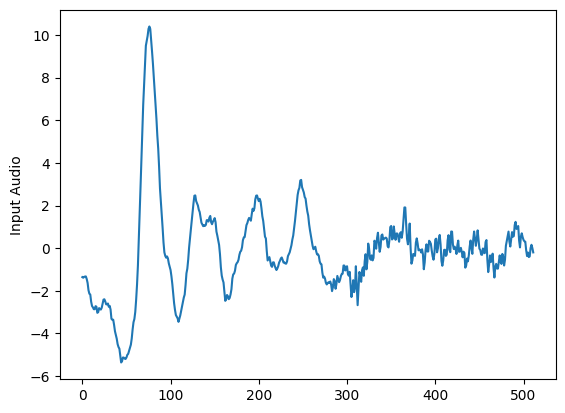

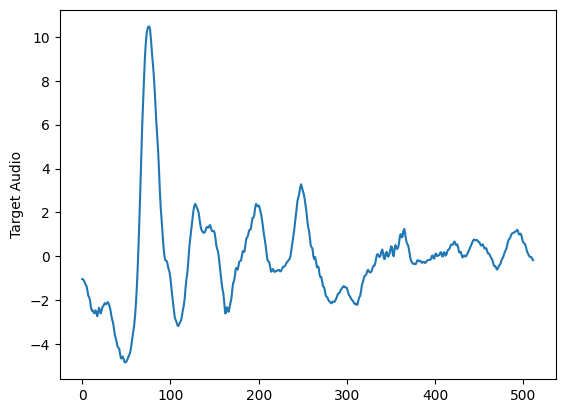

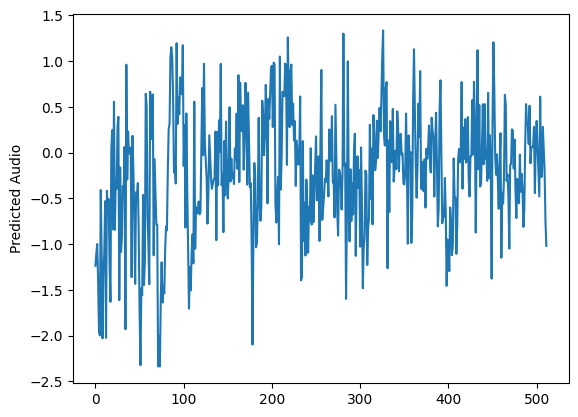

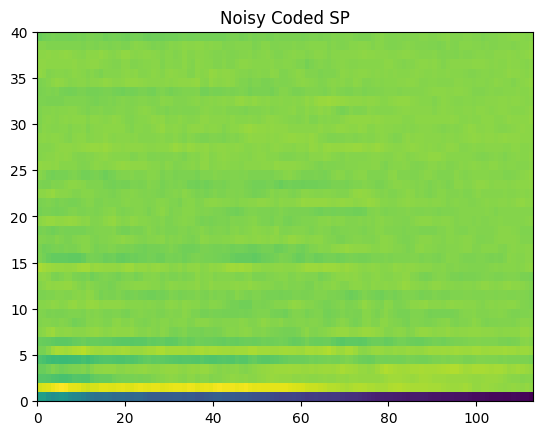

5.7809247970581055
0.12290786951780319


In [10]:
import models.VAEWavenet.WaveVaeDenoiser as WNVAE
import torch
import IPython
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from torch import nn
import torchaudio
import numpy as np
torch.cuda.empty_cache()
import tqdm
from torch.utils.data import DataLoader

mudec = torchaudio.transforms.MuLawDecoding()

newsample = torch.zeros(1, 1024)
oldsample = torch.zeros(1, 1024)
# datasample = torch.zeros(1, 512)
# sptestdataset = WNVAE.WaveVaeDataset("../ConvDenoiser_Old/testdata", "../ConvDenoiser_Old/urbansound", clip_length = 256, clips = 50)
sptest2dataloader = DataLoader(sptestdataset, batch_size=1, shuffle=True, pin_memory = False)
xau, xspec, target, rnnoise = next(iter(sptest2dataloader))

print(xau.size(), xspec.size(), target[:,:,512:1536].size())
print(torch.min(xau), torch.max(xau))
print(torch.min(xspec), torch.max(xspec))
print(torch.min(target), torch.max(target))
# print(xau[:, :, :10])




x_hat = denoiser1(xau.to(device), xspec.to(device), False)

# x_hat = nn.functional.softmax(x_hat, dim=1)

# for i in tqdm.trange(512):
#     probs = xau[:, :, i].data
#     pixel_sample = torch.multinomial(probs, 1).float()
#     pixel_sample = mudec(pixel_sample)
#     oldsample[0, i] = pixel_sample.squeeze()
    

# for i in tqdm.trange(512):
#     probs = x_hat[:, :, i].data
#     pixel_sample = torch.multinomial(probs, 1).float()
#     pixel_sample = mudec(pixel_sample)
#     newsample[0, i] = pixel_sample.squeeze()
    
    
plt.plot(xau.squeeze()[256:768].detach().cpu().numpy())
plt.ylabel('Input Audio')
plt.show()

plt.plot(target.squeeze()[256:768].detach().cpu().numpy())
plt.ylabel('Target Audio')
plt.show()

# plt.plot(xau.squeeze().detach().cpu().numpy() - target.squeeze().detach().cpu().numpy() )
# plt.ylabel('Noise Audio')
# plt.show()

plt.plot(x_hat.squeeze()[256:768].detach().cpu().numpy())
plt.ylabel('Predicted Audio')
plt.show()

# plt.plot(xau.squeeze().detach().cpu().numpy() - x_hat.squeeze().detach().cpu().numpy())
# plt.ylabel('Noise Audio')
# plt.show()


plt.pcolormesh(xspec.squeeze().detach().cpu().numpy())
plt.title("Noisy Coded SP")
plt.show()


# print(newsample.size())
# newsample = newsample.squeeze()
# newsample = newsample.detach().cpu().numpy()
# futuresamplereal = mudec(target).squeeze().squeeze().cpu().numpy()
# xau = xau.squeeze().squeeze()
# xau = xau.detach().cpu().numpy()
# print(np.shape(xau))
# print(np.shape(newsample))
# plt.plot(newsample)
# plt.ylabel('Full Generated')
# plt.show()

# plt.plot(np.append(futuresamplereal, newsample[-1]))
# plt.ylabel('Full Generated')
# plt.show()

# plt.plot(futuresamplereal)
# plt.ylabel('some numbers')
# plt.show()

# print('Target ', target.squeeze()[256:768])

# print('X_hat ',x_hat.squeeze()[256:768].detach().cpu())
# print('xau ',xau.squeeze()[256:768].detach().cpu())
loss_fn = torch.nn.MSELoss()
loss = loss_fn(x_hat.squeeze()[256:768].detach().cpu(), target.squeeze()[256:768].detach().cpu())
nloss = loss_fn(xau.squeeze()[256:768].detach().cpu(), target.squeeze()[256:768].detach().cpu())
print(loss.item())
print(nloss.item())

# print(noisy_audio.size())
# IPython.display.Audio(data = noisy_audio.squeeze().cpu().numpy(), rate = 33000)



In [3]:
from torchaudio.transforms import MuLawEncoding, MFCC, Resample
import librosa

def remove_silent_frames(audio, overlap = 256):
        
    if len(audio.shape) > 1:
        audio = np.ascontiguousarray((audio[:, 0]+audio[:, 1])/2)

    trimmed_audio = []
    indices = librosa.effects.split(audio, hop_length=overlap, top_db=20)

    for index in indices:
        trimmed_audio.extend(audio[index[0]: index[1]])

    return np.array(trimmed_audio)

audiopath = './clips/common_voice_en_33153438.mp3'
audiofile, samplerate = torchaudio.load(audiopath)
zeros = torch.zeros(1, 10000)
audiofile = remove_silent_frames(audiofile.squeeze().numpy())
audiofile = torch.from_numpy(audiofile).unsqueeze(0)
audiofile = torch.cat((zeros, audiofile), 1)
print(audiofile.size())
mfcc_trans = MFCC(samplerate, 64, melkwargs={"hop_length": 33})
mfcc = mfcc_trans(audiofile).squeeze() # Noisy audio spectrum

plt.pcolormesh(mfcc.squeeze().detach().cpu().numpy())
plt.title("Noisy Coded SP")
plt.show()
print(torch.min(mfcc), torch.max(mfcc))

RuntimeError: Failed to open the input "./clips/common_voice_en_33153438.mp3" (No such file or directory).

In [31]:
import models.VAEWavenet.WaveVaeDenoiser as WNVAE
import torch
import IPython
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from torch import nn
import torchaudio
import numpy as np

import tqdm
from torch.utils.data import DataLoader

mudec = torchaudio.transforms.MuLawDecoding()

newsample = torch.zeros(1, 256)
# datasample = torch.zeros(1, 512)
# spdataset = WNVAE.WaveVaeDataset("./clips", "./traindataset/csp/")
sptestdataloader = DataLoader(sptestdataset, batch_size=1, shuffle=True, pin_memory = False)
xau, xspec, target, noisy_audio = next(iter(sptestdataloader))

print(xau.size(), xspec.size(), target.size())

# for i in tqdm.trange(512):
#     probs = target[:, :, i].long().data
#     pixel_sample = torch.multinomial(probs, 1).float()
#     pixel_sample = mudec(pixel_sample)
#     datasample[0, i] = pixel_sample.squeeze()

print(noisy_audio.size())
IPython.display.Audio(data = noisy_audio.squeeze().cpu().numpy(), rate = 33000)


ValueError: not enough values to unpack (expected 4, got 3)

In [14]:
import models.VAEWavenet.WaveVaeDenoiser as WNVAE
import torch
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from torch import nn
import torchaudio
import numpy as np

import tqdm
from torch.utils.data import DataLoader

mudec = torchaudio.transforms.MuLawDecoding()

newsample = torch.zeros(1, 256)
# datasample = torch.zeros(1, 512)
# spdataset = WNVAE.WaveVaeDataset("./clips", "./traindataset/csp/")
sptestdataloader = DataLoader(spdataset, batch_size=1, shuffle=True, pin_memory = False)
xau, xspec, target = next(iter(sptestdataloader))
print(xau.size(), xspec.size(), target.size())
target2 = torch.nn.functional.one_hot(target, num_classes = 256).squeeze().float().permute(1, 0).unsqueeze(0)
print(target2.size())
    
newsample = newsample.unsqueeze(0)
target = target.squeeze().unsqueeze(0)
print(target2[:, :, -1])
print(target[:, -1])
    
print(target2.size(), target.size())
b = target2.size()[0]
# reproduction_loss = torch.nn.functional.cross_entropy(target2, target2, reduce=False).view(b, -1).mean(dim=1)
reproduction_loss = torch.nn.functional.cross_entropy(target.float()[:, -1], target2[:, :, -1], reduction='mean')
print("Reproduction loss:", reproduction_loss.item())

torch.Size([1, 256])
tensor([[185, 183, 182, 183, 184, 184, 182, 180, 180, 183, 185, 185, 183, 182,
         183, 186, 187, 187, 186, 184, 183, 184, 184, 184, 182, 181, 180, 181,
         181, 180, 181, 183, 185, 185, 184, 183, 183, 183, 184, 184, 182, 180,
         179, 180, 183, 183, 181, 178, 180, 184, 186, 186, 184, 182, 181, 182,
         184, 185, 185, 182, 179, 179, 183, 185, 184, 181, 179, 182, 185, 187,
         185, 182, 181, 181, 182, 183, 183, 182, 180, 180, 181, 183, 184, 183,
         183, 183, 184, 185, 185, 184, 182, 181, 181, 182, 183, 182, 180, 178,
         179, 182, 184, 184, 184, 184, 184, 184, 185, 185, 184, 183, 180, 179,
         181, 183, 182, 180, 178, 180, 182, 183, 184, 183, 182, 182, 182, 183,
         184, 183, 183, 182, 182, 182, 181, 181, 180, 181, 182, 183, 183, 183,
         183, 182, 182, 183, 184, 183, 183, 182, 183, 183, 183, 182, 180, 179,
         181, 183, 184, 184, 184, 183, 182, 180, 180, 183, 186, 186, 184, 181,
         181, 182, 184, 185, 18

RuntimeError: 0D or 1D target tensor expected, multi-target not supported

# Training Time

In [5]:
import wandb
import models.PixelVAEDenoiser as PAE
import matplotlib.pyplot as plt
from torchaudio.transforms import MFCC
import torchaudio
import math
from torch import nn
torch.cuda.empty_cache()
from tqdm.auto import tqdm

denoiser.train(True)
actual_kl = 0.5
klmax = 0.05
epochs = 100
valstep = 0
# mfcc_transform = MFCC(22050, 20, log_mels = True, melkwargs={"hop_length": 105}).cuda()
mfcc_transform = torchaudio.transforms.Spectrogram().cuda()

wandb.init(
    # set the wandb project where this run will be logged
    project="WaveVAE Denoiser",
    
    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.00001,
    "architecture": "WaveVAE Denoiser",
    "dataset": "LJSpeech, noisy MFCC",
    "epochs": 100,
    }
)

wandb.watch(denoiser, criterion=loss_fn, log="all", log_freq=1)

# def energy_combined_loss(x, x_hat, target, noise, mu, log_var, klrate):
def energy_combined_loss(x_hat, target, mu, log_var):
    # b = x.size()[0]

    # estimated_noise = x.squeeze() - x_hat.squeeze()
    # reproduction_loss = torch.mean(torch.sum(torch.abs(target.squeeze()[:, 255:257] - x_hat.squeeze()[:, 255:257]) + torch.abs(noise.squeeze()[:, 255:257] - estimated_noise[:, 255:257]), dim=1), dim = 0)
    reproduction_loss = loss_fn(x_hat.squeeze()[:, 1536:5632], target.squeeze()[:, 1536:5632])
    # reproduction_loss = reproduction_loss * math.log2(math.e)
    kl_loss = torch.mean(-0.5 * torch.sum(torch.sum(1 + log_var - mu ** 2 - log_var.exp(), dim = 2), dim = 1), dim = 0)

    return reproduction_loss + kl_loss * ((actual_kl % 10) * klmax), reproduction_loss
    # return reproduction_loss, reproduction_loss




def gen_plot(noisy, denoised, clean):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle("Test MSFC result")
        # print(noisy.size())
        ax1.pcolormesh(mfcc_transform(noisy[1536:5632]).squeeze().detach().cpu().numpy())
        ax2.pcolormesh(mfcc_transform(denoised[1536:5632]).squeeze().detach().cpu().numpy())
        ax3.pcolormesh(mfcc_transform(clean[1536:5632]).squeeze().detach().cpu().numpy())
        return fig

def validate(epoch):
        denoiser.eval()

        total_loss1 = 0
        total_rec_gen = 0
        total_rec_noise = 0
        step = 0
        fig = 0
        with tqdm(enumerate(sptestdataloader),total=len(sptestdataloader),desc=f"Validating.") as t:
            for batch_idx, (x, xspec, target, noise) in t:
                step += 1

                x = x.to(device)
                if x.size()[0] <= 1:
                    step += -1
                    continue
                
                xspec = xspec.to(device)
                target = target.to(device)

                x_hat, mean, var = denoiser(x, xspec, False)
                loss, recloss_gen = energy_combined_loss(x_hat, target, mean, var)
                badloss, recloss_noise = energy_combined_loss(x, target, mean, var)
                total_loss1 += loss.detach().cpu().item()
                total_rec_gen += recloss_gen.item()
                
                total_rec_noise += recloss_noise.item()
                if batch_idx == 5:
                    fig = gen_plot(x[0].squeeze(), x_hat[0].squeeze(), target[0].squeeze())

        denoiser.train(True)
        
        
        avg_loss1 = total_loss1/step
        avg_loss_noise = total_rec_noise / step
        avg_loss_gen = total_rec_gen / step
        return avg_loss1, avg_loss_noise, avg_loss_gen, fig
    
totalstep = 3970
minipoch = 26
for epoch in range(epochs):
    lossy1 = 0
    step = 0
    step2 = 0
    reclossy = 0
    

    with tqdm(enumerate(spdataloader),total=len(spdataloader),desc=f"Training. Epoch: {epoch}. Loss for step {step}: {lossy1}") as t:
        for batch_idx, (x, xspec, target, noise) in t:
            if x.size()[0] == batchsize:
                optimizer1.zero_grad(set_to_none=True)
                
                step = batch_idx + 1
                step2 += 1            

                x = x.to(device)
                xspec = xspec.to(device)
                target = target.to(device)
                # noise = noise.to(device)
                x_hat, mean, var = denoiser(x, xspec, True)
                
                loss, recloss = energy_combined_loss(x_hat, target, mean, var)
                loss1 = loss.item()
                reclossy += recloss.item()
                lossy1 += loss1
                loss.backward()
                optimizer1.step()

                t.set_description(f"Training. Epoch: {round(epoch,2)}. Loss for step {round(step, 2)}: {round(loss1, 2)}.")
                totalstep += 1
                
                del loss
                del x
                del x_hat
                # del mean
                # del variance
                del xspec
                del target
                
                if step % (len(spdataloader) // 30) == 0 or step - 1 == 0:
                    
                    test_loss, noise_test_loss, val_recloss, fig = validate(minipoch)
                    # writer.add_scalar('Train loss', lossy1 / step2, minipoch)
                    wandb.log({'epoch': epoch,
                                    'train_loss': lossy1 / step2,
                                    'train_recl_gen': reclossy / step2,
                                    'val_loss_comb': test_loss,
                                    'val_loss_rec': val_recloss,
                                    'val_loss_noise': noise_test_loss,
                                    'kl_rate': ((actual_kl % 10) * klmax),
                                    'validation_spec_result' : wandb.Image(fig) })
                    lossy = 0
                    reclossy = 0
                    step2 = 0
                    # writer.add_scalars('Validation loss', {'Noisy reconstruction':noise_test_loss,
                                                        #   'Test loss': test_loss}, minipoch)
                    torch.save(denoiser.state_dict(), f"./NewModelsFixed/NewWaveAe{minipoch}")
                    
                    minipoch += 1  
                    actual_kl += 0.5
                    if ((actual_kl % 10) * klmax) == 0.:
                        klmax += 0.05
    
    

# writer.flush()
torch.save(denoiser.state_dict(), "./vaemodelsnoisy1/WaveVaeTestModel2")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: wouterbesse. Use `wandb login --relogin` to force relogin


Training. Epoch: 0. Loss for step 0: 0:   0%|          | 0/13410 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

c:\Users\woute\.conda\envs\GeneralAI\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Training. Epoch: 1. Loss for step 0: 0:   0%|          | 0/13410 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

Validating.:   0%|          | 0/178 [00:00<?, ?it/s]

: 

: 

In [3]:
%pip install tensorboard

     ---------------------------------------- 6.0/6.0 MB 6.7 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 6.5 MB/s eta 0:00:00
     -------------------------------------- 181.5/181.5 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 93.9/93.9 kB 5.2 MB/s eta 0:00:00
     -------------------------------------- 905.1/905.1 kB 6.3 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3 kB 5.5 MB/s eta 0:00:00
     -------------------------------------- 233.6/233.6 kB 7.2 MB/s eta 0:00:00
     -------------------------------------- 181.3/181.3 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 83.9/83.9 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.2
    Uninstalling protobuf-4.23.2:
      Su

In [6]:
# import torchaudio
# import torch
# audiofile, samplerate = torchaudio.load('./clips/common_voice_en_33153438.mp3' )
# zeros = torch.zeros(1, 20)
# print(torch.min(audiofile), torch.max(audiofile))
# print(audiofile.size())
# print(torch.cat((zeros, audiofile), 1).size())

tensor(-0.3934) tensor(0.4220)
torch.Size([1, 237312])
torch.Size([1, 237332])


In [3]:
torch.save(denoiser.state_dict(), "./vaemodelsaudio/modelnormalised1")

# Test Model

## Load Model

In [1]:
import models.VAEWavenet.WaveVaeDenoiser as WNVAE
import torch
from torch import nn
import numpy as np
from torch.utils.data import DataLoader

# Model hyperparameters
device='cuda:0'
print(torch.cuda.device_count())
# Model hyperparameters
features = 40
rec_field = 112
upsamples = [2, 2, 2, 2, 2, 7]
latent_space_dim = 16

denoiser = WNVAE.WaveNetVAE(input_size = (features, rec_field), device = device, num_hiddens = 768, dil_rates = upsamples, zsize = latent_space_dim)
denoiser.to(device)

# original saved file with DataParallel
state_dict = torch.load('./NewModelsFixed/NewWaveAe74')
# create new OrderedDict that does not contain `module.`
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
    
denoiser.load_state_dict(state_dict)
# denoiser = denoiser.to(device)

# spdataset = WNVAE.WaveVaeDataset("H:/Downloads/LJSpeech-1.1/LJSpeech-1.1/wavs", "H:/Downloads/UrbanSound8K/UrbanSound8K/audio/fold9", clip_length = 1536, clips = 1500)
# sptestdataset = WNVAE.WaveVaeDataset("H:/Downloads/LJSpeech-1.1/LJSpeech-1.1/val", "H:/Downloads/UrbanSound8K/UrbanSound8K/audio/fold9", clip_length = 1536, clips = 20)

# spdataloader = DataLoader(spdataset, batch_size=batchsize, shuffle=True, pin_memory = True, num_workers = 8)
# sptestdataloader = DataLoader(sptestdataset, batch_size=batchsize, shuffle=False, pin_memory = False)


# optimizer1=torch.optim.AdamW(denoiser.parameters(), lr=0.0001)

1
[1, 2, 4, 8, 16, 32, 64, 128, 256]
Receptive field =  3067.0


<All keys matched successfully>

In [4]:
from torch.utils.data import DataLoader

spdataloader = DataLoader(spdataset, batch_size=2, shuffle=True, pin_memory = True, num_workers = 8)
sptestdataloader = DataLoader(sptestdataset, batch_size=2, shuffle=False, pin_memory = False)


optimizer1=torch.optim.AdamW(denoiser.parameters(), lr=0.0001)

## Inference TIme

c:\Users\woute\.conda\envs\GeneralAI\lib\site-packages\torchaudio\functional\functional.py:572: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  "At least one mel filterbank has all zero values. "


22050


Loading files to dataset. Len clean_files =  128. : 100%|██████████| 7/7 [00:00<00:00, 31.93it/s]


Samplerate: 22050


Generating!!!: 100%|██████████| 64/64 [00:00<00:00, 846.86it/s]

~~ Noisy audio ~~ torch.Size([524288])


~~ Target clean audio ~~ torch.Size([524288])


Generating!!!: 100%|██████████| 64/64 [00:18<00:00,  3.52it/s]


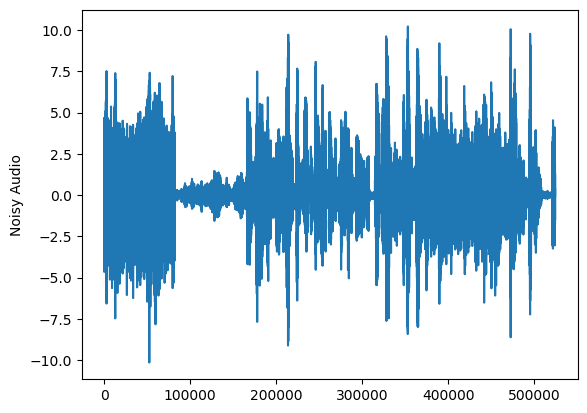

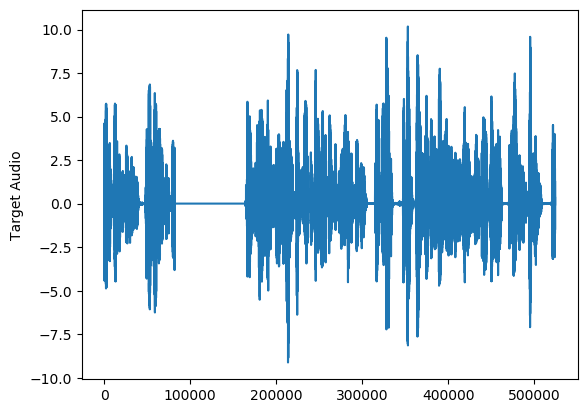

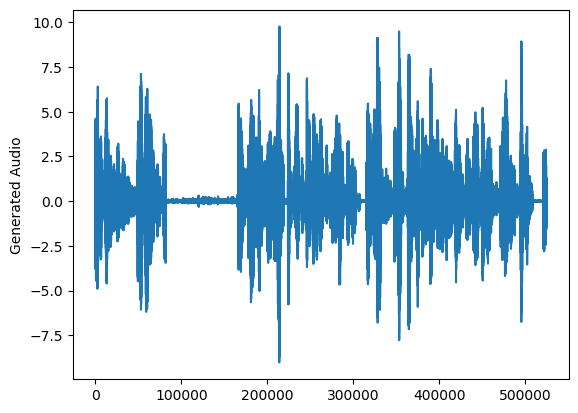

~~ Generated audio ~~


In [2]:
import models.VAEWavenet.WaveVaeDenoiser as WNVAE
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt
from torch import nn
import torchaudio
import numpy as np
import IPython

import tqdm
from torch.utils.data import DataLoader
denoiser.eval()
mudec = torchaudio.transforms.MuLawDecoding()
batch_size = 2
noisy_audio = torch.zeros(0)
target_audio = torch.zeros(0)
generated_audio = torch.zeros(0)

spdataset = WNVAE.WaveVaeDataset("H:/Downloads/LJSpeech-1.1/LJSpeech-1.1/wavs", "H:/Downloads/UrbanSound8K/UrbanSound8K/audio/fold9", clip_length = 1536, clips = 7)
spdataloader = DataLoader(spdataset, batch_size=batch_size, shuffle=False, pin_memory = False)
with torch.no_grad():
    with tqdm.tqdm(enumerate(spdataloader),total=len(spdataloader),desc=f"Generating!!!") as t:
            for batch_idx, (x, xspec, target, _) in t:
                x = x
                target = target
                if len(x.size()) > 1:
                    for i in range(x.size()[0]):            
                        noisy_audio = torch.cat((noisy_audio, x.squeeze().detach().cpu()[i, 1536:5632].squeeze()), 0)
                        target_audio = torch.cat((target_audio, target.squeeze().detach().cpu()[i, 1536:5632].squeeze()), 0)
                else:
                        noisy_audio = torch.cat((noisy_audio, x.squeeze().detach().cpu()[1536:5632].squeeze()), 0)
                        target_audio = torch.cat((target_audio, target.squeeze().detach().cpu()[1536:5632].squeeze()), 0)

    print("~~ Noisy audio ~~", noisy_audio.size())
    IPython.display.display(IPython.display.Audio(data = noisy_audio.squeeze().cpu().numpy(), rate = 22050))
    print("~~ Target clean audio ~~", target_audio.size())
    IPython.display.display(IPython.display.Audio(data = target_audio.squeeze().cpu().numpy(), rate = 22050))

    with tqdm.tqdm(enumerate(spdataloader),total=len(spdataloader),desc=f"Generating!!!") as t:
            for batch_idx, (x, xspec, target, _) in t:
                x = x.to(device)
                xspec = xspec.to(device)
                target = target.to(device)

                x_hat, mean, var = denoiser(x, xspec, True)
                
                if len(x.size()) > 0:
                    for i in range(x_hat.size()[0]):            
                        # noisy_audio = torch.cat((noisy_audio, x.squeeze().detach().cpu()[i, 255:257].squeeze()), 0)
                        generated_audio = torch.cat((generated_audio, x_hat.squeeze().detach().cpu()[i, 1536:5632].squeeze()), 0)
                    # target_audio = torch.cat((target_audio, target.squeeze().detach().cpu()[i, 255:257].squeeze()), 0)
                else:
                    generated_audio = torch.cat((generated_audio, x_hat.squeeze().detach().cpu()[1536:5632].squeeze()), 0)
                # print(complete_output.size())
                # print(x_hat.squeeze()[:, -1].unsqueeze(1).size())
            



# print(newsample.size())
# newsample = newsample.squeeze()
# newsample = newsample.detach().cpu().numpy()
# futuresamplereal = mudec(target).squeeze().squeeze().cpu().numpy()
# xau = xau.squeeze().squeeze()
# xau = xau.detach().cpu().numpy()
# print(np.shape(xau))
# print(np.shape(newsample))
# plt.plot(newsample)
# plt.ylabel('Full Generated')
# plt.show()

plt.plot(noisy_audio.detach().cpu().numpy())
plt.ylabel('Noisy Audio')
plt.show()

plt.plot(target_audio.detach().cpu().numpy())
plt.ylabel('Target Audio')
plt.show()

plt.plot(generated_audio.detach().cpu().numpy())
plt.ylabel('Generated Audio')
plt.show()
print("~~ Generated audio ~~")
IPython.display.display(IPython.display.Audio(data = generated_audio.squeeze().cpu().numpy(), rate = 22050))
# print(futuresamplereal[-1])

# print(newsample[-1])

In [6]:
print("~~ Noisy audio ~~", noisy_audio.size())
IPython.display.display(IPython.display.Audio(data = noisy_audio.squeeze().cpu().numpy() - 0.5, rate = 33000))
print("~~ Target clean audio ~~", target_audio.size())
IPython.display.display(IPython.display.Audio(data = target_audio.squeeze().cpu().numpy() - 0.5, rate = 33000))
print("~~ Generated audio ~~")
IPython.display.display(IPython.display.Audio(data = generated_audio.squeeze().cpu().numpy() - 0.5, rate = 33000))




~~ Noisy audio ~~ torch.Size([127488])


~~ Target clean audio ~~ torch.Size([127488])


~~ Generated audio ~~


In [16]:
import models.VAEWavenet.WaveVaeDenoiser as WNVAE
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt
from torch import nn
import torchaudio
import numpy as np
import IPython

import tqdm

noisy_audio = torch.zeros(0)
target_audio = torch.zeros(0)

# spdataset = WNVAE.WaveVaeDataset("./testdata", "./urbansound", clip_length = 256, clips = 1)
# spdataloader = DataLoader(spdataset, batch_size=1, shuffle=False, pin_memory = False)

with tqdm.tqdm(enumerate(spdataloader),total=len(spdataloader),desc=f"Generating!!!") as t:
        for batch_idx, (x, xspec, target, _) in t:
            x = x
            # xspec = xspec.to(device)
            target = target
            for i in range(batch_size):            
                noisy_audio = torch.cat((noisy_audio, x.squeeze().detach().cpu()[i, 255:257].squeeze()), 0)
                target_audio = torch.cat((target_audio, target.squeeze().detach().cpu()[i, 255:257].squeeze()), 0)
            # print(complete_output.size())
            # print(x_hat.squeeze()[:, -1].unsqueeze(1).size())
            
print(noisy_audio.size())
IPython.display.Audio(data = noisy_audio.squeeze().detach().cpu().numpy(), rate = 33000)

Generating!!!: 100%|████████████████████████████████████████████████████████████| 14112/14112 [00:06<00:00, 2059.87it/s]

torch.Size([112896])


In [5]:
backupsample = complete_output

In [9]:
complete_output = backupsample
print(complete_output[:, 1].size())
newsample = torch.zeros(1)
for i in tqdm.trange(complete_output.size()[1] - 1):
    try:
        probs = complete_output[:, i + 1].unsqueeze(dim = 1).data
        
        pixel_sample = torch.multinomial(probs, 1).float()
        pixel_sample = mudec(pixel_sample)
        newsample = torch.cat((newsample, pixel_sample.squeeze()), 1)
    except:
        print(probs.size())
        continue

torch.Size([256])


  0%|                                                                               | 12/83199 [00:00<12:00, 115.48it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|                                                                               | 25/83199 [00:00<11:35, 119.62it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|                                                                               | 39/83199 [00:00<10:53, 127.34it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|                                                                               | 53/83199 [00:00<10:30, 131.89it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|                                                                               | 68/83199 [00:00<10:16, 134.95it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|                                                                               | 82/83199 [00:00<10:09, 136.36it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|                                                                               | 96/83199 [00:00<10:04, 137.50it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|                                                                              | 110/83199 [00:00<10:06, 137.03it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|                                                                              | 124/83199 [00:00<10:05, 137.09it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|▏                                                                             | 138/83199 [00:01<10:05, 137.11it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|▏                                                                             | 152/83199 [00:01<10:03, 137.64it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|▏                                                                             | 166/83199 [00:01<10:00, 138.30it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|▏                                                                             | 181/83199 [00:01<09:57, 138.93it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|▏                                                                             | 195/83199 [00:01<09:59, 138.37it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|▏                                                                             | 209/83199 [00:01<09:58, 138.65it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|▏                                                                             | 223/83199 [00:01<10:23, 133.12it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|▏                                                                             | 238/83199 [00:01<10:04, 137.16it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|▏                                                                             | 253/83199 [00:01<09:53, 139.87it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|▎                                                                             | 268/83199 [00:01<09:46, 141.51it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|▎                                                                             | 283/83199 [00:02<09:38, 143.28it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|▎                                                                             | 298/83199 [00:02<09:32, 144.73it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|▎                                                                             | 313/83199 [00:02<09:28, 145.68it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|▎                                                                             | 328/83199 [00:02<09:27, 146.15it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|▎                                                                             | 343/83199 [00:02<09:28, 145.87it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|▎                                                                             | 358/83199 [00:02<09:28, 145.65it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|▎                                                                             | 373/83199 [00:02<09:26, 146.25it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|▎                                                                             | 388/83199 [00:02<09:25, 146.48it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  0%|▍                                                                             | 403/83199 [00:02<09:27, 145.80it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▍                                                                             | 418/83199 [00:02<09:29, 145.25it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▍                                                                             | 433/83199 [00:03<09:28, 145.70it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▍                                                                             | 448/83199 [00:03<09:25, 146.23it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▍                                                                             | 463/83199 [00:03<09:25, 146.18it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▍                                                                             | 478/83199 [00:03<09:23, 146.75it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▍                                                                             | 493/83199 [00:03<09:22, 146.95it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▍                                                                             | 508/83199 [00:03<09:21, 147.34it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▍                                                                             | 523/83199 [00:03<09:21, 147.25it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▌                                                                             | 538/83199 [00:03<09:24, 146.49it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▌                                                                             | 553/83199 [00:03<09:23, 146.77it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▌                                                                             | 568/83199 [00:04<09:24, 146.45it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▌                                                                             | 583/83199 [00:04<09:22, 147.00it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▌                                                                             | 598/83199 [00:04<09:23, 146.59it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▌                                                                             | 613/83199 [00:04<09:22, 146.90it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▌                                                                             | 628/83199 [00:04<09:21, 146.95it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▌                                                                             | 643/83199 [00:04<09:20, 147.24it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▌                                                                             | 658/83199 [00:04<09:20, 147.39it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▋                                                                             | 673/83199 [00:04<09:22, 146.84it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▋                                                                             | 688/83199 [00:04<09:24, 146.26it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▋                                                                             | 703/83199 [00:04<09:22, 146.75it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▋                                                                             | 718/83199 [00:05<09:20, 147.05it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▋                                                                             | 733/83199 [00:05<09:22, 146.66it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▋                                                                             | 748/83199 [00:05<09:20, 147.08it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▋                                                                             | 763/83199 [00:05<09:20, 147.01it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▋                                                                             | 778/83199 [00:05<09:22, 146.65it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▋                                                                             | 793/83199 [00:05<09:21, 146.87it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▊                                                                             | 808/83199 [00:05<09:20, 146.93it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▊                                                                             | 823/83199 [00:05<09:19, 147.21it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▊                                                                             | 838/83199 [00:05<09:19, 147.33it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▊                                                                             | 853/83199 [00:05<09:18, 147.52it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▊                                                                             | 868/83199 [00:06<09:17, 147.62it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▊                                                                             | 883/83199 [00:06<09:17, 147.57it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▊                                                                             | 898/83199 [00:06<09:17, 147.73it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▊                                                                             | 913/83199 [00:06<09:16, 147.86it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▊                                                                             | 928/83199 [00:06<09:15, 147.97it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▉                                                                             | 943/83199 [00:06<09:18, 147.25it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▉                                                                             | 958/83199 [00:06<09:18, 147.19it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▉                                                                             | 973/83199 [00:06<09:18, 147.33it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▉                                                                             | 988/83199 [00:06<09:16, 147.65it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▉                                                                            | 1003/83199 [00:06<09:16, 147.65it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▉                                                                            | 1018/83199 [00:07<09:17, 147.44it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▉                                                                            | 1033/83199 [00:07<09:17, 147.47it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▉                                                                            | 1048/83199 [00:07<09:16, 147.59it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▉                                                                            | 1063/83199 [00:07<09:16, 147.70it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|▉                                                                            | 1078/83199 [00:07<09:16, 147.52it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|█                                                                            | 1093/83199 [00:07<09:15, 147.84it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|█                                                                            | 1108/83199 [00:07<09:15, 147.72it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|█                                                                            | 1123/83199 [00:07<09:15, 147.69it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|█                                                                            | 1138/83199 [00:07<09:17, 147.09it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


  1%|█                                                                            | 1152/83199 [00:07<09:28, 144.39it/s]

torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])
torch.Size([256, 1])


KeyboardInterrupt: 

In [7]:
print(newsample.size())
# print(newsample)

torch.Size([21297409])


tensor([ 0., -1., -1.,  ..., -1., -1., -1.])


KeyboardInterrupt: 

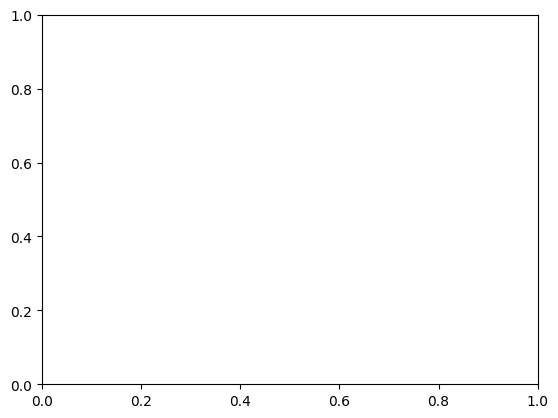

In [8]:
print(newsample)
# newsample = newsample.squeeze()
# newsample = newsample.detach().cpu().numpy()
# futuresamplereal = mudec(target).squeeze().squeeze().cpu().numpy()
# xau = xau.squeeze().squeeze()
# xau = xau.detach().cpu().numpy()
# print(np.shape(xau))
# print(np.shape(newsample))
plt.plot(newsample)
plt.ylabel('Full Generated')
plt.show()

# plt.plot(np.append(xau[-511:] * 2 - 1, newsample[-1]))
# plt.ylabel('Full Generated')
# plt.show()

# plt.plot(futuresamplereal)
# plt.ylabel('some numbers')
# plt.show()

# print(futuresamplereal[-1])

# print(newsample)